# Importing Libraries

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/hmnist_28_28_RGB.csv')

In [88]:
y = data['label']
x = data.drop(columns = ['label'])

In [89]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [90]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


# Exploratory Data Analysis (EDA)

In [91]:
df = pd.read_csv('/content/drive/MyDrive/HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
classes = {0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           1:('bcc' , ' basal cell carcinoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           3: ('df', 'dermatofibroma'),
           4: ('nv', ' melanocytic nevi'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           6: ('mel', 'melanoma')
           }

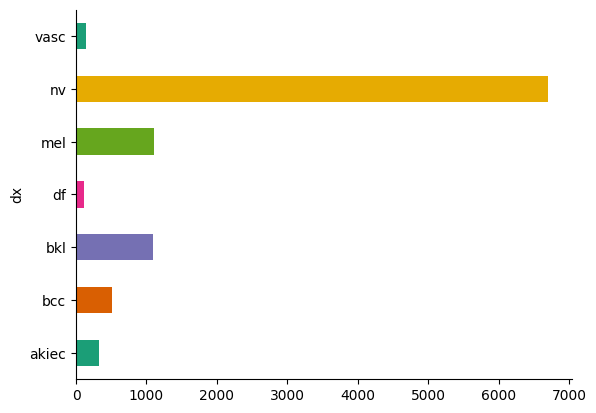

In [92]:
# @title dx

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('dx').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Oversampling
**To overcome class imbalace**

In [93]:
t = np.zeros([46935, 32, 32, 3],dtype=np.float32)
print(t.shape)

(46935, 32, 32, 3)


In [94]:
import scipy.ndimage

In [95]:
for i in range(46935):
    t[i] = scipy.ndimage.zoom(x[i],32/28)

In [96]:
x = np.array(t).reshape(-1,32,32,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 32, 32, 3)


In [97]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Model Training

In [98]:
vgg=tf.keras.applications.VGG16(input_shape=(32,32,3),weights='imagenet', include_top=False)
for i in vgg.layers:
    i.trainable = False

In [99]:
#initial
model = tf.keras.models.Sequential([
    vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7, activation = 'softmax')
])
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,718,279 (56.15 MB)

 Trainable params: 3,591 (14.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [ ]:
model = tf.keras.models.Sequential([
    vgg,
#     tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
#     tf.keras.layers.Activation("relu"),
#     tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
#     tf.keras.layers.Activation("relu"),
#     tf.keras.layers.Conv2D(32, (3, 3), padding="same"),
#     tf.keras.layers.Activation("relu"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7, activation = 'softmax')
])
print(model.summary())

In [ ]:
# model = Sequential()
# model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2,2)))
# model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(7, activation='softmax'))
# model.summary()

In [101]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model-vgg16-initial_param.keras',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)


In [102]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 100,
                    callbacks=[callback])

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3966 - loss: 1.6148
Epoch 1: saving model to best_model-vgg16-initial_param.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.3970 - loss: 1.6139 - val_accuracy: 0.5823 - val_loss: 1.1909
Epoch 2/100
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5914 - loss: 1.1466
Epoch 2: saving model to best_model-vgg16-initial_param.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5914 - loss: 1.1464 - val_accuracy: 0.6166 - val_loss: 1.0665
Epoch 3/100
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6221 - loss: 1.0431
Epoch 3: saving model to best_model-vgg16-initial_param.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6221 - loss: 1.0428 - val_accuracy: 0.6402 - val_loss: 1.0010
Epoch 4/100
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6454 - loss: 0.9759
Epoch 4: saving model to best_model-vgg16-initial_param.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - ac

# Plot Accuracy and Loss

## Accuracy (training vs validation dataset)

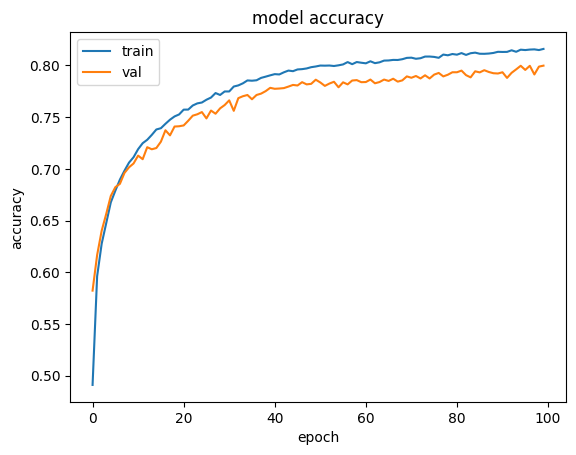

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Loss (training vs validation dataset)

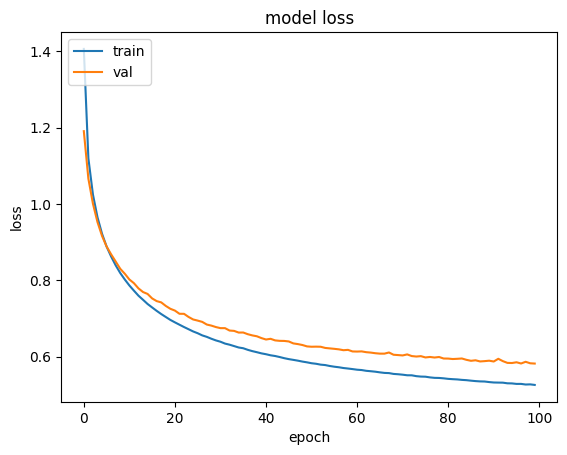

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [108]:
model.load_weights('best_model-vgg16-initial_param.keras')


# Model Testing

In [109]:
loss, acc = model.evaluate(X_train, Y_train, verbose=2)

1174/1174 - 8s - 7ms/step - accuracy: 0.8163 - loss: 0.5336


In [110]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 3s - 9ms/step - accuracy: 0.7982 - loss: 0.5799


In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

In [113]:
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)

confusion_matrix = metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred_labels)

294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [114]:
class_labels = ['akiec','bcc','bkl','df','nv','vasc','mel']
report = sklearn.metrics.classification_report(Y_test, y_pred_labels, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

       akiec       0.77      0.86      0.81      1359
         bcc       0.77      0.83      0.80      1318
         bkl       0.63      0.57      0.60      1262
          df       0.92      0.99      0.96      1351
          nv       0.78      0.69      0.73      1374
        vasc       0.98      1.00      0.99      1358
         mel       0.69      0.63      0.66      1365

    accuracy                           0.80      9387
   macro avg       0.79      0.80      0.79      9387
weighted avg       0.79      0.80      0.79      9387



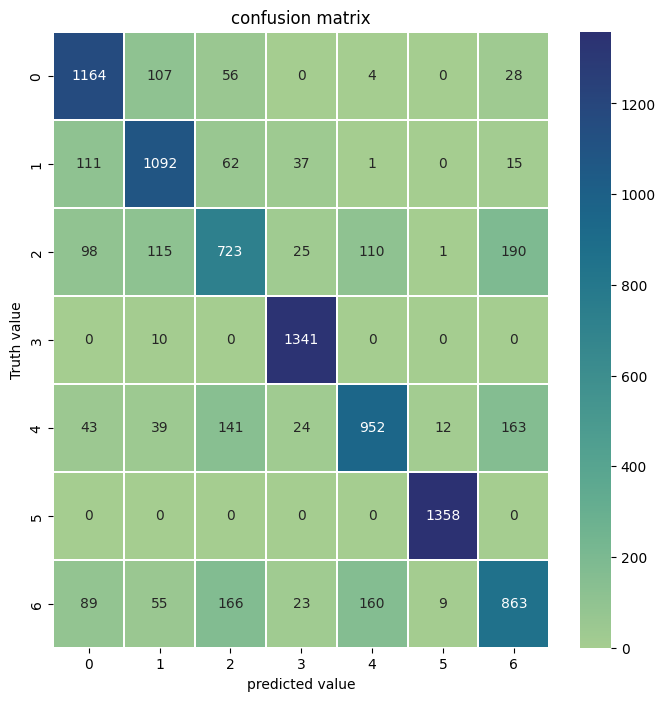

In [116]:
cm = sklearn.metrics.confusion_matrix(Y_test, y_pred_labels)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', cmap="crest", annot=True, linewidths=0.2 )
plt.title('confusion matrix')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


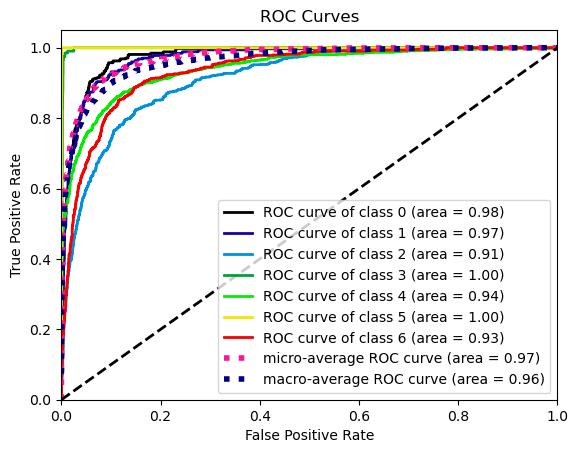

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_roc_curve(Y_test, y_pred_ohe)
plt.show()